In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

print('Libraries imported sucessfully !!')

Libraries imported sucessfully !!


In [2]:
df = pd.read_csv('titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [4]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [5]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [6]:
X = df.drop(columns=[ 'Survived'])
y = df['Survived']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [8]:
X_train.isnull().sum()

Age       140
Fare       36
Family      0
dtype: int64

In [9]:
X_test.isnull().sum()

Age       37
Fare       9
Family     0
dtype: int64

In [13]:
X_train

,Age,Fare,Family
331,45.5,28.5000,0
733,23.0,13.0000,0
382,32.0,7.9250,0
704,26.0,7.8542,1
813,6.0,31.2750,6
...,...,...,...
106,21.0,7.6500,0
270,NaN,31.0000,0
860,41.0,NaN,2
435,14.0,120.0000,3


In [15]:
X_train['Age_median'] = X_train.Age.fillna(X_train.Age.median())
X_train['Age_mean'] = X_train.Age.fillna(X_train.Age.mean())

X_train['Fare_median'] = X_train.Fare.fillna(X_train.Fare.median())
X_train['Fare_mean'] = X_train.Fare.fillna(X_train.Fare.mean())

In [16]:
X_train

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
331,45.5,28.5000,0,45.5,45.500000,28.5000,28.500000
733,23.0,13.0000,0,23.0,23.000000,13.0000,13.000000
382,32.0,7.9250,0,32.0,32.000000,7.9250,7.925000
704,26.0,7.8542,1,26.0,26.000000,7.8542,7.854200
813,6.0,31.2750,6,6.0,6.000000,31.2750,31.275000
...,...,...,...,...,...,...,...
106,21.0,7.6500,0,21.0,21.000000,7.6500,7.650000
270,NaN,31.0000,0,28.0,29.498846,31.0000,31.000000
860,41.0,NaN,2,41.0,41.000000,14.4000,32.517788
435,14.0,120.0000,3,14.0,14.000000,120.0000,120.000000


In [17]:
X_test

,Age,Fare,Family
709,NaN,15.2458,2
439,31.0,10.5000,0
840,20.0,7.9250,0
720,6.0,33.0000,1
39,14.0,11.2417,1
...,...,...,...
433,17.0,7.1250,0
773,NaN,7.2250,0
25,38.0,31.3875,6
84,17.0,10.5000,0


In [18]:
print( 'Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print( 'Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())


Original Age variable variance:  210.2517072477438
Age Variance after median imputation:  169.20731007048096
Age Variance after mean imputation:  168.8519336687225
Original Fare variable variance:  2761.031434948639
Fare Variance after median imputation:  2637.01248167777
Fare Variance after mean imputation:  2621.2323749512393


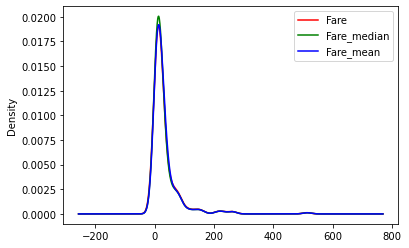

In [30]:
fig =plt.figure()
ax = fig.add_subplot(111)


X_train.Fare.plot(kind='kde', ax=ax,c='r')
X_train.Fare_median.plot(kind='kde', ax=ax,c='g')
X_train.Fare_mean.plot(kind='kde', ax=ax,c='b')

# add Legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


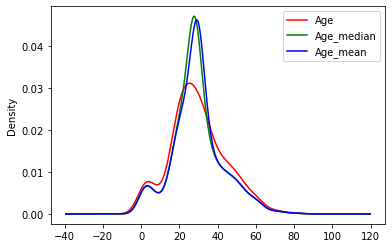

In [31]:
fig =plt.figure()
ax = fig.add_subplot(111)


X_train.Age.plot(kind='kde', ax=ax,c='r')
X_train.Age_median.plot(kind='kde', ax=ax,c='g')
X_train.Age_mean.plot(kind='kde', ax=ax,c='b')

# add Legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [32]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,70.082085,71.193767
Fare,75.481375,2761.031435,18.599163,63.938058,60.224654,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.587710,-5.616299,17.672035,17.657433
Age_median,210.251707,63.938058,-5.587710,169.207310,168.851934,59.728510,60.700688
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,56.282518,57.175304
Fare_median,70.082085,2761.031435,17.672035,59.728510,56.282518,2637.012482,2621.232375
Fare_mean,71.193767,2761.031435,17.657433,60.700688,57.175304,2621.232375,2621.232375


In [33]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.087232,0.088944
Fare,0.091482,1.000000,0.207193,0.093496,0.088151,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.255307,-0.256883,0.204536,0.204981
Age_median,1.000000,0.093496,-0.255307,1.000000,0.998949,0.089416,0.091145
Age_mean,1.000000,0.088151,-0.256883,0.998949,1.000000,0.084346,0.085941
Fare_median,0.087232,1.000000,0.204536,0.089416,0.084346,1.000000,0.997003
Fare_mean,0.088944,1.000000,0.204981,0.091145,0.085941,0.997003,1.000000


<AxesSubplot:>

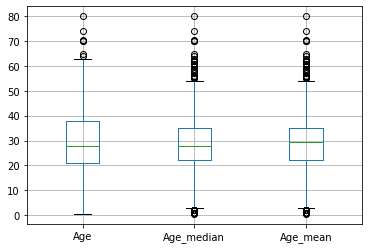

In [35]:
X_train[["Age", 'Age_median', 'Age_mean']].boxplot()


<AxesSubplot:>

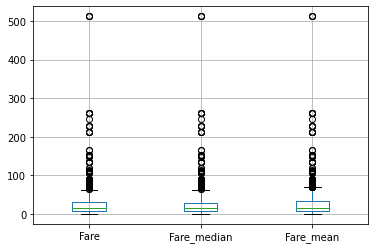

In [36]:
X_train[["Fare", 'Fare_median', 'Fare_mean']].boxplot()

# Using Sklearn

In [37]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [39]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])],remainder='passthrough')

In [40]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [41]:
trf.named_transformers_['imputer1'].statistics_

array([28.])

In [42]:
trf.named_transformers_['imputer2'].statistics_

array([32.51778772])

In [44]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [47]:
X_train

array([[ 45.5       ,  28.5       ,   0.        ],
       [ 23.        ,  13.        ,   0.        ],
       [ 32.        ,   7.925     ,   0.        ],
       ...,
       [ 41.        ,  32.51778772,   2.        ],
       [ 14.        , 120.        ,   3.        ],
       [ 21.        ,  77.2875    ,   1.        ]])

# Impute Arbitary number

In [48]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [56]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

 

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [57]:
X_train

,Age,Fare,Family,Age _99,Age_minus1,Fare_999,Fare_minus1,Age_99
331,45.5,28.5000,0,45.5,45.5,28.5000,28.5000,45.5
733,23.0,13.0000,0,23.0,23.0,13.0000,13.0000,23.0
382,32.0,7.9250,0,32.0,32.0,7.9250,7.9250,32.0
704,26.0,7.8542,1,26.0,26.0,7.8542,7.8542,26.0
813,6.0,31.2750,6,6.0,6.0,31.2750,31.2750,6.0
...,...,...,...,...,...,...,...,...
106,21.0,7.6500,0,21.0,21.0,7.6500,7.6500,21.0
270,NaN,31.0000,0,99.0,-1.0,31.0000,31.0000,99.0
860,41.0,NaN,2,41.0,41.0,999.0000,-1.0000,41.0
435,14.0,120.0000,3,14.0,14.0,120.0000,120.0000,14.0


In [58]:
print(' Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())

  

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())


 Original Age variable variance:  210.2517072477438
Age Variance after 99 wala imputation:  932.9665366701436
Age Variance after -1 wala imputation:  315.99550362600644
Original Fare variable variance:  2761.031434948639
Fare Variance after 999 wala imputation:  47525.47059536007
Fare Variance after -1 wala imputation:  2675.2394049177087


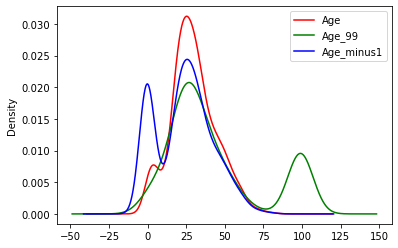

In [59]:
fig =plt.figure()
ax = fig.add_subplot(111)


X_train.Age.plot(kind='kde', ax=ax,c='r')
X_train.Age_99.plot(kind='kde', ax=ax,c='g')
X_train.Age_minus1.plot(kind='kde', ax=ax,c='b')

# add Legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

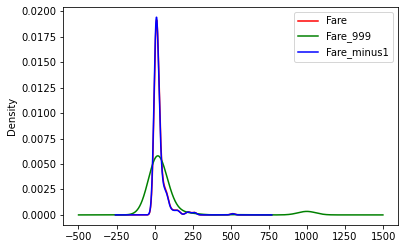

In [60]:
fig =plt.figure()
ax = fig.add_subplot(111)


X_train.Fare.plot(kind='kde', ax=ax,c='r')
X_train.Fare_999.plot(kind='kde', ax=ax,c='g')
X_train.Fare_minus1.plot(kind='kde', ax=ax,c='b')

# add Legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [61]:
X_train.cov()

,Age,Fare,Family,Age _99,Age_minus1,Fare_999,Fare_minus1,Age_99
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,130.495777,69.137162,210.251707
Fare,75.481375,2761.031435,18.599163,-111.965046,135.785804,2761.031435,2761.031435,-111.965046
Family,-6.993325,18.599163,2.830892,-6.941982,-5.034556,16.878492,17.684447,-6.941982
Age _99,210.251707,-111.965046,-6.941982,932.966537,-166.460682,-255.051165,-101.137070,932.966537
Age_minus1,210.251707,135.785804,-5.034556,-166.460682,315.995504,262.712284,124.270305,-166.460682
Fare_999,130.495777,2761.031435,16.878492,-255.051165,262.712284,47525.470595,1063.944817,-255.051165
Fare_minus1,69.137162,2761.031435,17.684447,-101.137070,124.270305,1063.944817,2675.239405,-101.137070
Age_99,210.251707,-111.965046,-6.941982,932.966537,-166.460682,-255.051165,-101.137070,932.966537


In [62]:
X_train.corr()

,Age,Fare,Family,Age _99,Age_minus1,Fare_999,Fare_minus1,Age_99
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.039967,0.085422,1.000000
Fare,0.091482,1.000000,0.207193,-0.069365,0.145071,1.000000,1.000000,-0.069365
Family,-0.319651,0.207193,1.000000,-0.135079,-0.168329,0.046016,0.203212,-0.135079
Age _99,1.000000,-0.069365,-0.135079,1.000000,-0.306576,-0.038303,-0.064017,1.000000
Age_minus1,1.000000,0.145071,-0.168329,-0.306576,1.000000,0.067792,0.135159,-0.306576
Fare_999,0.039967,1.000000,0.046016,-0.038303,0.067792,1.000000,0.094357,-0.038303
Fare_minus1,0.085422,1.000000,0.203212,-0.064017,0.135159,0.094357,1.000000,-0.064017
Age_99,1.000000,-0.069365,-0.135079,1.000000,-0.306576,-0.038303,-0.064017,1.000000


# Arbitary Value using Sklearn

In [63]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])],remainder='passthrough')

trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [64]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [65]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [66]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [67]:
X_train

array([[ 45.5   ,  28.5   ,   0.    ],
       [ 23.    ,  13.    ,   0.    ],
       [ 32.    ,   7.925 ,   0.    ],
       ...,
       [ 41.    , 999.    ,   2.    ],
       [ 14.    , 120.    ,   3.    ],
       [ 21.    ,  77.2875,   1.    ]])